In [1]:
import scIB
import scanpy as sc
import anndata as ad
import copy
import os


In [2]:
sc.settings.set_figure_params(dpi=80, dpi_save=400)
cwd = os.getcwd()
cwd

'/mnt/znas/icb_zstore01/groups/ce01/workspace/Benchmarking_data_integration/notebooks/integration'

# Read the data

In [3]:
#finput="../../data/brain_atac_fang_10x/merge_10x_CEMBA180312_3B_bin_merged_filterRowCol_filterCountCell_regression.h5ad"
finput="../../data/brain_atac_3datasets/merge_10x_CEMBA180312_3B_GSM3034638_bin_merged_filterRowCol_regression.h5ad"

adata = ad.read(finput)

In [4]:
adata

AnnData object with n_obs × n_vars = 9300 × 125449 
    obs: 'batch', 'batchname', 'n_genes', 'counts'
    var: 'keep-0-0', 'n_cells-0-0', 'overlap_3datasets', 'first_filtering-1', 'second_filtering-1', 'n_cells-1', 'n_cells'
    uns: 'batchname_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'

# Before integration

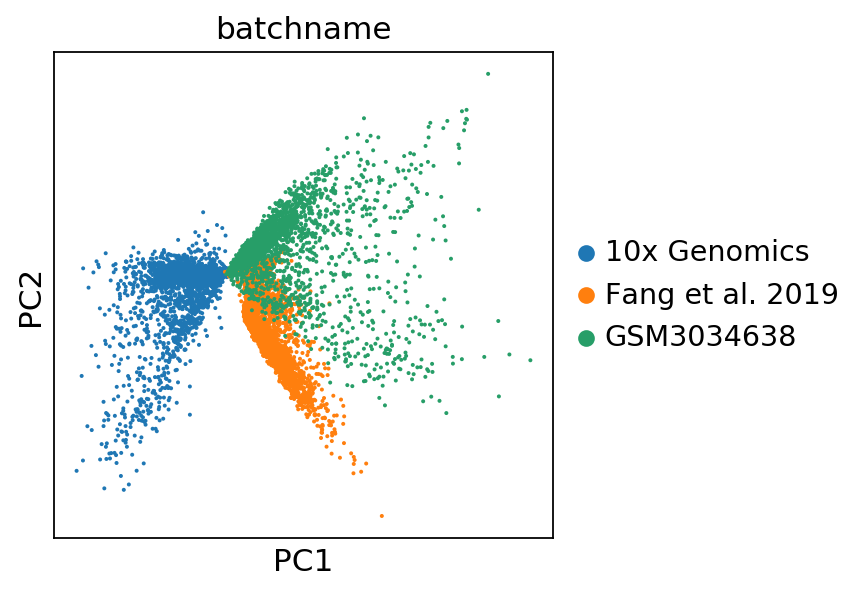

In [5]:
sc.pl.pca(adata,color='batchname')

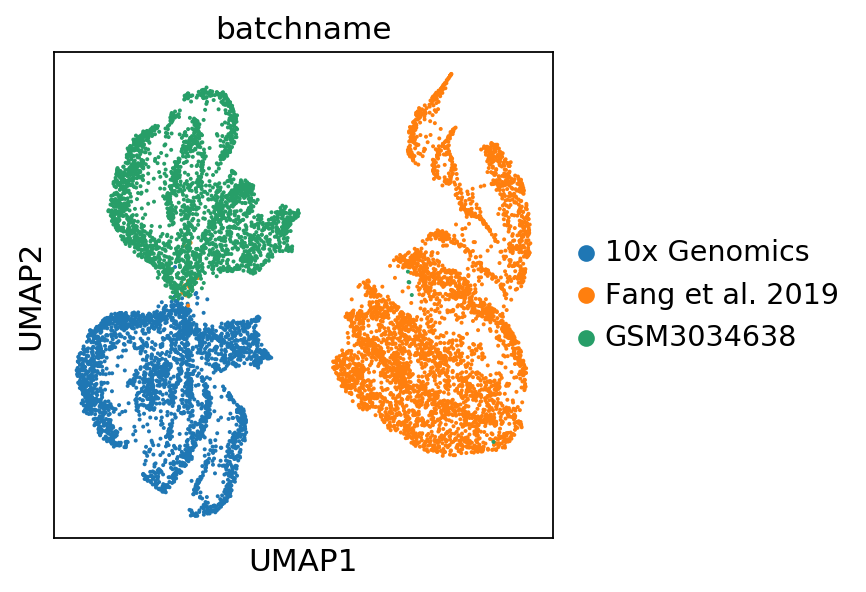

In [6]:
sc.pl.umap(adata,color='batchname')

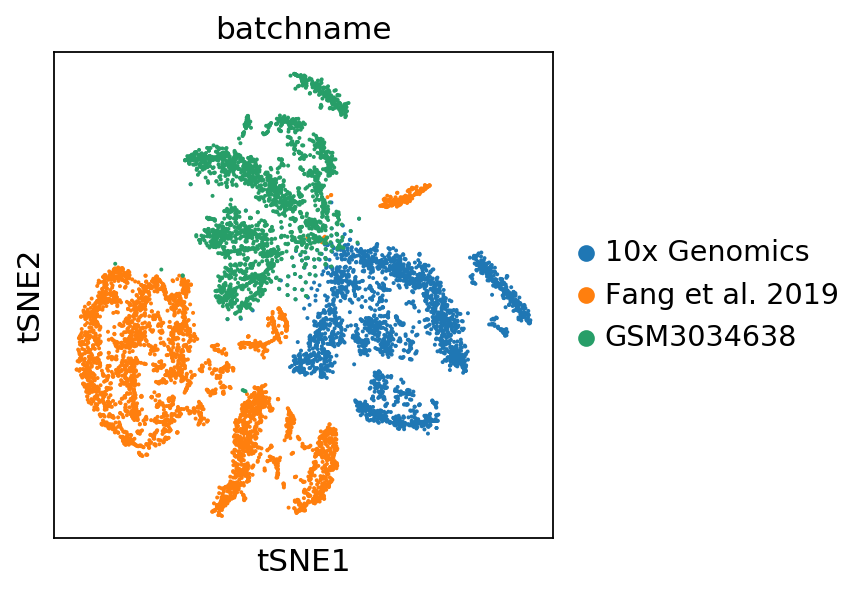

In [7]:
sc.pl.tsne(adata,color='batchname')

# Integration

In [8]:
res=scIB.integration.runMNN(adata, batch='batch')

/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/mnnpy/utils.py:14: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "l2_norm" failed type inference due to: Invalid use of Function(<function norm at 0x7f84480c2840>) with argument(s) of type(s): (axis=Literal[int](1), x=array(float32, 2d, A))
 * parameterized
In definition 0:
    TypeError: norm_impl() got an unexpected keyword argument 'x'
    raised from /home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/typing/templates.py:475
In definition 1:
    TypeError: norm_impl() got an unexpected keyword argument 'x'
    raised from /home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/typing/templates.py:475
This error is usually caused by passing an argument of a type that is unsupported by the named function.
[1] During: resolving callee type: Function(<function norm at 0x7f84480c2840>)
[2] Du

/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/mnnpy/utils.py:199: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "adjust_s_variance" failed type inference due to: Untyped global name 'sq_dist_to_line': cannot determine Numba type of <class 'numba.ir.UndefinedType'>

File "../../../../../../../../../home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/mnnpy/utils.py", line 209:
def adjust_s_variance(data1, data2, curcell, curvect, sigma):
    <source elided>
        sameproj = np.dot(grad, samecell)
        samedist = sq_dist_to_line(curcell, grad, samecell)
        ^

  @jit(float32(float32[:, :], float32[:, :], float32[:], float32[:], float32), nogil=True)
/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/mnnpy/utils.py:199: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "adjust_s_variance

Performing cosine normalization...


/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/mnnpy/utils.py:14: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "l2_norm" failed type inference due to: Invalid use of Function(<function norm at 0x7f84480c2840>) with argument(s) of type(s): (axis=Literal[int](1), x=array(float32, 2d, A))
 * parameterized
In definition 0:
    TypeError: norm_impl() got an unexpected keyword argument 'x'
    raised from /home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/typing/templates.py:475
In definition 1:
    TypeError: norm_impl() got an unexpected keyword argument 'x'
    raised from /home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/typing/templates.py:475
This error is usually caused by passing an argument of a type that is unsupported by the named function.
[1] During: resolving callee type: Function(<function norm at 0x7f84480c2840>)
[2] Du

error: 'i' format requires -2147483648 <= number <= 2147483647

In [ ]:
res

In [ ]:
foutput="../../data/brain_atac_3datasets/atac_brain_result_MNN.h5ad"
res.write(foutput)
    

# After integration

In [ ]:
finput="../../data/brain_atac_3datasets/atac_brain_result_MNN.h5ad"
integrated_res = ad.read(finput)

In [ ]:
sc.pp.pca(integrated_res)
sc.pp.neighbors(integrated_res)
sc.tl.umap(integrated_res)
sc.tl.tsne(integrated_res)

In [ ]:
integrated_res

In [ ]:
fplot="_brain_atac_after_integration_MNN.pdf"
sc.pl.pca(integrated_res, color='batchname',save=fplot)


In [ ]:
fplot="_brain_atac_after_integration_MNN.pdf"
sc.pl.umap(integrated_res, color='batchname',save=fplot)


In [ ]:
fplot="_brain_atac_after_integration_MNN.pdf"
sc.pl.tsne(integrated_res, color='batchname',save=fplot)
